<a href="https://colab.research.google.com/github/yashgoyal1122/Customer_segementation/blob/main/customer_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# Create a sample dataset
data = {
    'CustomerID': range(1, 201),
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income (k$)': np.random.randint(20, 150, size=200),
    'Spending Score (1-100)': np.random.randint(1, 101, size=200)
}

# Convert to DataFrame
df = pd.DataFrame(data)


In [4]:
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop the 'CustomerID' column as it's not relevant for clustering
df.drop(columns=['CustomerID'], inplace=True)


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   57                 145                      24
1           2   55                 110                      71
2           3   47                 126                      46
3           4   23                  67                      84
4           5   66                  54                      96
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)


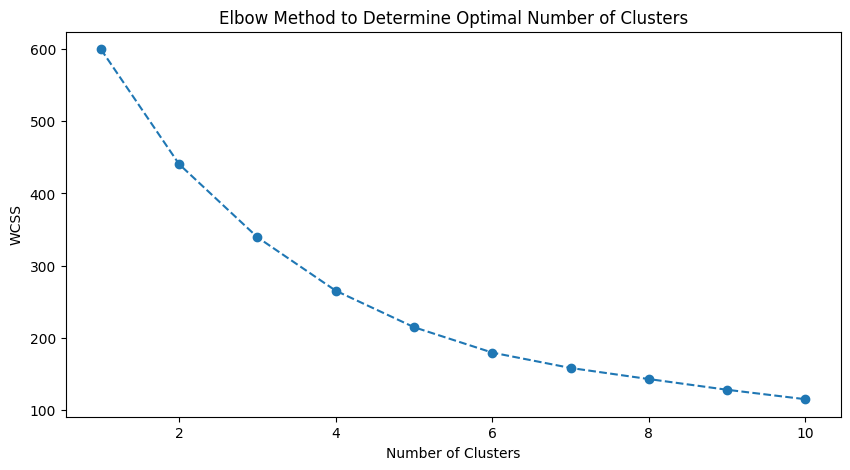

In [6]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_df)


<Figure size 1000x700 with 0 Axes>

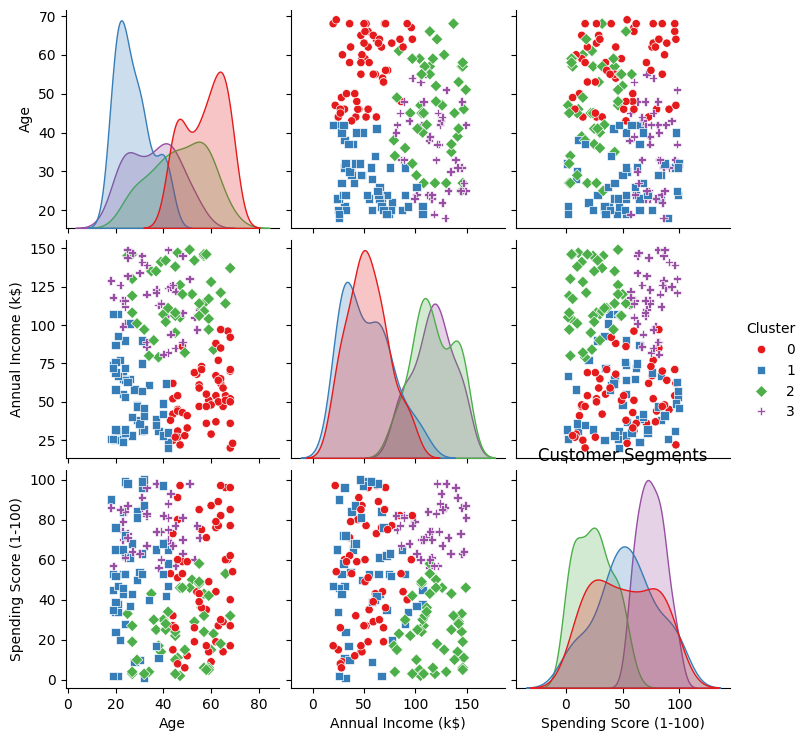

In [8]:
plt.figure(figsize=(10, 7))
sns.pairplot(df, hue='Cluster', palette='Set1', markers=['o', 's', 'D', 'P'])
plt.title('Customer Segments')
plt.show()


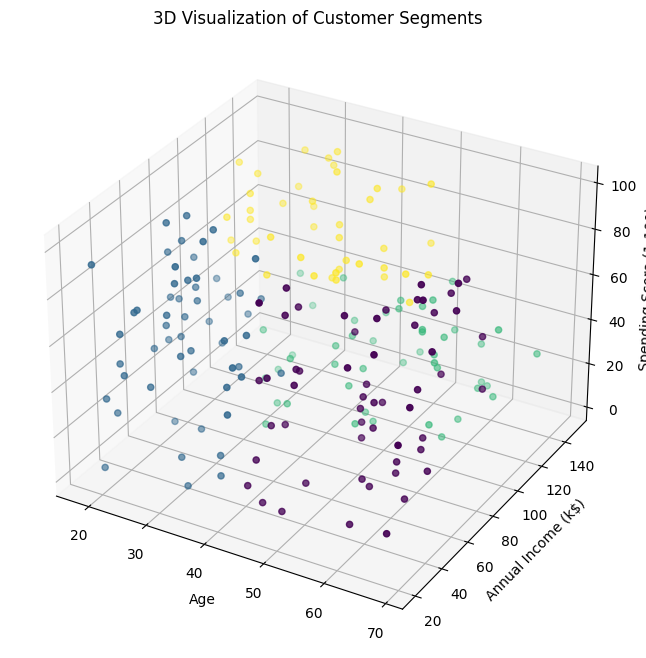

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Visualization of Customer Segments')
plt.show()


In [10]:
# Show the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=df.columns[:-1])
print(cluster_centers)


         Age  Annual Income (k$)  Spending Score (1-100)
0  57.178571           53.535714               51.250000
1  27.464286           52.839286               53.392857
2  46.804348          117.500000               24.956522
3  35.738095          117.190476               75.285714
